In [3]:
import sys
from collections import defaultdict,Counter
from nltk.corpus import stopwords
import random
import json
import pandas
import re
Tweet_words = []
df = pandas.read_csv('INDvsENGds_updated2.csv',engine="python")
df=df[['Created_at','Text_new']]

punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''


Per_fileHandle = open("Players.txt","r");
Tea_fileHandle = open("Teams.txt","r");
Loc_fileHandle = open("Venue.txt","r");

PerDict = defaultdict(Counter)
TeaDict = defaultdict(Counter)
LocDict = defaultdict(Counter)
finalDict = defaultdict(Counter)

LocIndDict={}
PerIndDict={}
TeaIndDict={}

locs=[]
teams=[]
pers=[]

for line in Loc_fileHandle:
    LocDict['LOC'][line.rstrip().lower()]+=1
    locs.append(line.rstrip().lower())
    
for line in Per_fileHandle:
    PerDict['PER'][(line.lower().rstrip().split()[0])]+=1
    PerDict['PER'][(line.lower().rstrip().split()[1])]+=1
    pers.extend(line.rstrip().lower().split())
    
for line in Tea_fileHandle:
    TeaDict['TEA'][line.rstrip().lower()]+=1
    teams.append(line.rstrip().lower())

    
for locations in (LocDict['LOC']):
    LocIndDict[locations]=[]
    
for persons in (PerDict['PER']):
    PerIndDict[persons]=[]

for team in (TeaDict['TEA']):
    TeaIndDict[team]=[]
    
count=1
for text in df['Text_new']: 
    count=count+1
    Tweet_words=[]
    
    text= re.sub(r'[^\w\s]', '', text)
    Tweet_words+=(text.lower().split(" "))
    
    for i in range(len(locs)):
        if(locs[i] in Tweet_words):
            LocIndDict[locs[i]].append(count)
    
    for i in range(len(pers)):
        if(pers[i] in Tweet_words):
            PerIndDict[pers[i]].append(count)
            
    for i in range(len(teams)):
        if(teams[i] in Tweet_words):
            TeaIndDict[teams[i]].append(count)

    
    
print(LocIndDict,"\n\n")
print(PerIndDict,"\n\n")
print(TeaIndDict,"\n\n")

{'narendra modi stadium': [], 'ahmedabad': [44, 58, 81, 116, 197, 335, 336, 353, 356, 401, 489, 491, 492, 565, 641, 1044, 1120, 1498, 1585, 2300, 2484, 2503, 2646, 3119, 3653, 3675, 3791, 3987, 4278, 4846, 5917, 6094, 6192, 6413, 6532, 6629, 7179, 7922, 7929, 7944, 8238, 8288, 8534, 8608, 8613, 8780, 8988, 9251, 9357, 9538, 9583, 9923, 10000, 10049, 10166, 10403, 10908, 11174, 11485, 12231, 13408, 13569, 14695, 14898, 15335, 15343, 15351, 15376, 15489, 15529, 15567, 15592, 15628, 15651, 15657, 15922, 16137, 16223, 16255, 16374, 16476, 16517, 16593], 'motera stadium rd': [], 'motera': [44, 653, 839, 1129, 1477, 2282, 2519, 8003, 9846, 14594], 'sabarmati': [2282], 'gujarat': [335, 336, 522, 4472, 4830, 4878, 6610, 6629], 'narendra': [22, 44, 58, 311, 312, 335, 336, 653, 1036, 1083, 1144, 1564, 1732, 2278, 3119, 3544, 3894, 6291, 7871, 8444, 9389, 12015, 12774, 14676, 15901, 16133, 16659], 'modi': [22, 44, 58, 220, 311, 312, 335, 336, 547, 653, 1036, 1083, 1131, 1144, 1564, 1732, 2278, 31

In [4]:
playercount=[]
sum=0
for i in range(len(pers)):
    if(i%2==0 and i!=0):
        playercount.append(sum)
        #print(pers[i-1],sum)
        sum = 0
    for j in range(len(PerIndDict[pers[i]])):
        sum += 1
    #print(pers[i],sum)
playercount.append(sum)

In [5]:
players=[]
playername=[]
with open("Players.txt","r") as f:
    for line in f:
        players.append(line.rstrip().lower().split())
        playername.append(line.rstrip())

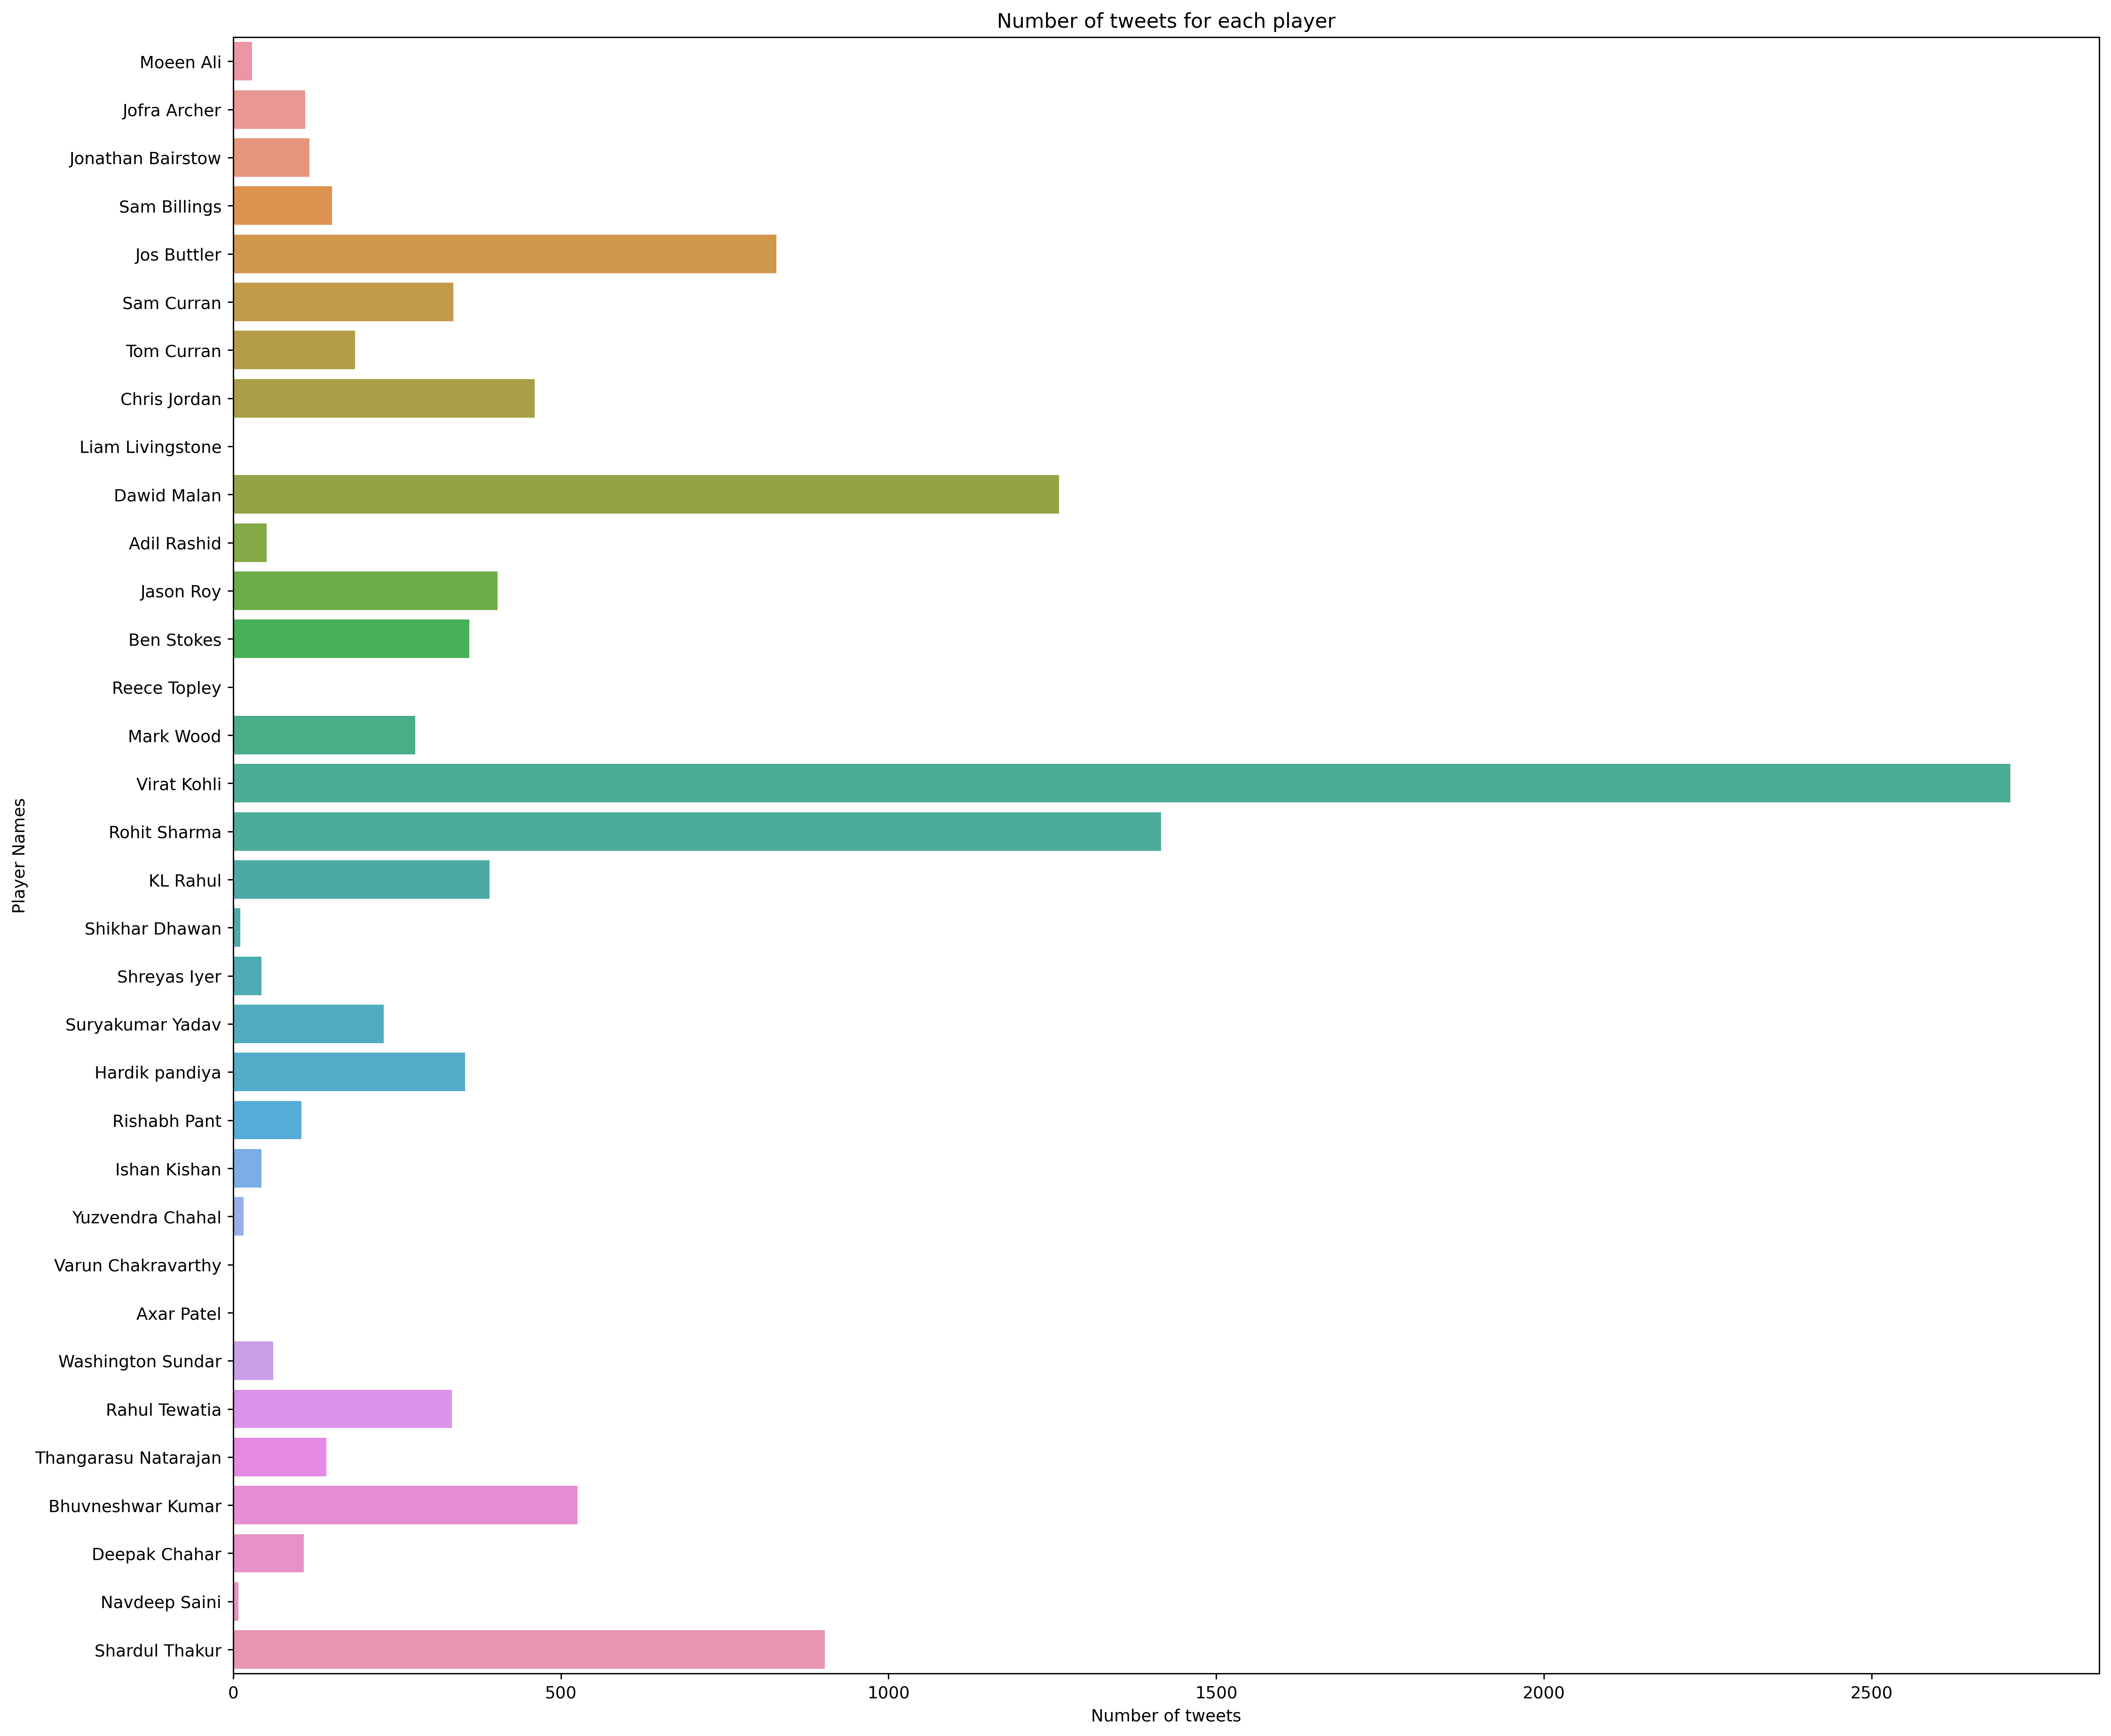

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

figure(num=None, figsize=(20,18), dpi=256, facecolor='w', edgecolor='r')
plt.title("Number of tweets for each player")
sns.barplot(playercount, playername)
plt.ylabel("Player Names")
plt.xlabel("Number of tweets")
plt.show()

In [7]:
playercount

[29,
 110,
 116,
 151,
 829,
 336,
 186,
 460,
 0,
 1260,
 51,
 403,
 360,
 0,
 278,
 2712,
 1416,
 391,
 11,
 43,
 230,
 354,
 104,
 43,
 16,
 0,
 1,
 61,
 334,
 142,
 525,
 108,
 8,
 903]

In [9]:
teamcount=[]
sum=0
for i in range(len(teams)):
    if(i%2==0 and i!=0):
        teamcount.append(sum)
        sum = 0
    for j in range(len(TeaIndDict[teams[i]])):
        sum += 1
teamcount.append(sum)

In [10]:
teamcount

[2207, 2004]

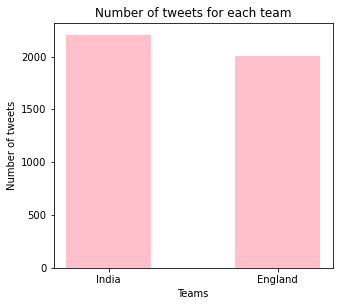

In [96]:
plt.figure(figsize=[5, 4.5])
plt.bar(['India','England'], teamcount, width=0.5, color='pink')
plt.title('Number of tweets for each team')
plt.xlabel('Teams')
plt.ylabel('Number of tweets')
plt.show()